Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Data Collection & Analysis

In [4]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [5]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [7]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [8]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [9]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-10-3634923312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


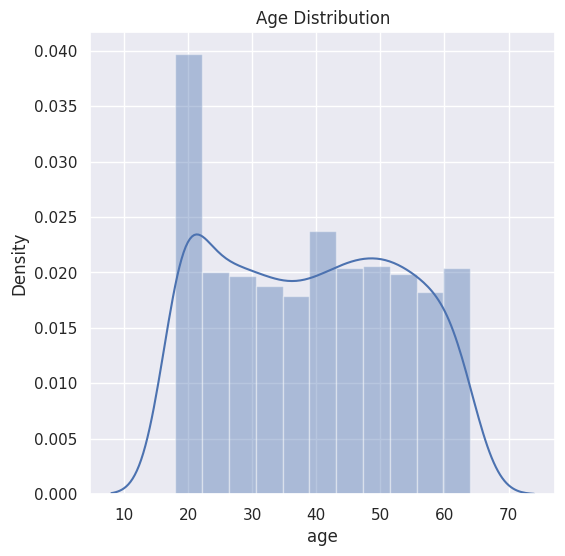

In [10]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

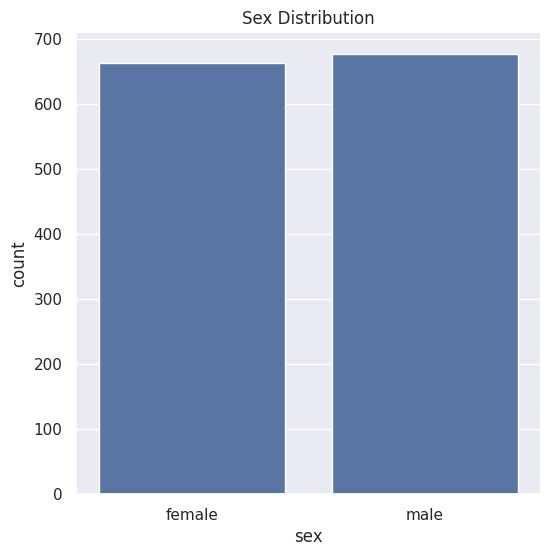

In [11]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-13-1916795400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


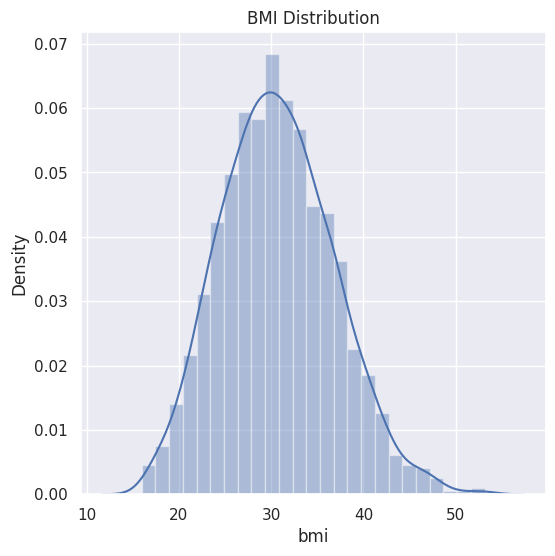

In [13]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

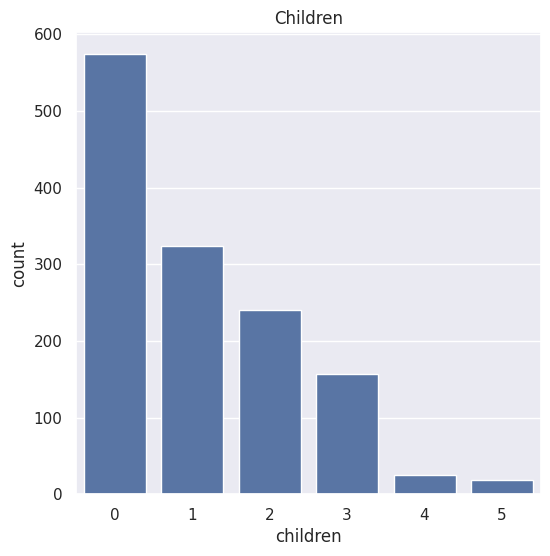

In [14]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


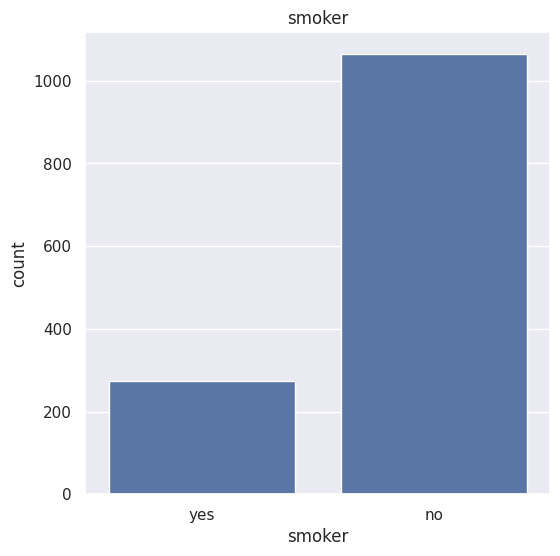

In [16]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


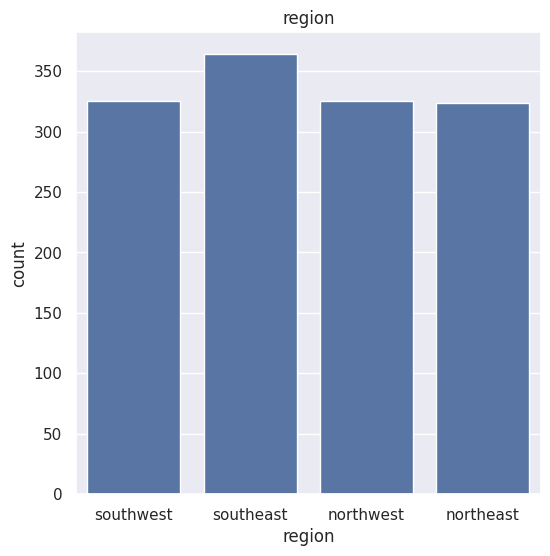

In [18]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-20-3971177022.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


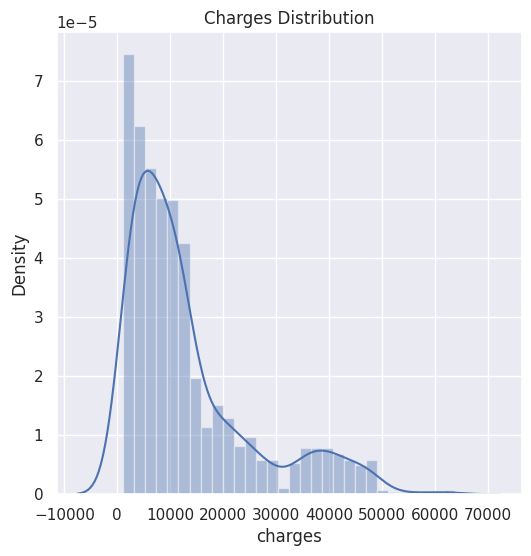

In [20]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [21]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/tmp/ipython-input-21-2871422651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
/tmp/ipython-input-21-2871422651.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
/tmp/ipython-input-21-2871422651.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

Splitting the Features and Target

In [22]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [23]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [24]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [27]:
# loading the Linear Regression model
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [29]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [30]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [31]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [32]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [33]:
# Apply Polynomial Features to the training and testing data
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

# Train a new Linear Regression model on the polynomial features
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, Y_train)

# Model Evaluation with Polynomial Regression
# prediction on training data with polynomial features
training_data_prediction_poly = poly_regressor.predict(X_train_poly)

# R squared value for polynomial regression on training data
r2_train_poly = metrics.r2_score(Y_train, training_data_prediction_poly)
print('R squared value (Polynomial Regression) on training data: ', r2_train_poly)

# prediction on test data with polynomial features
test_data_prediction_poly = poly_regressor.predict(X_test_poly)

# R squared value for polynomial regression on test data
r2_test_poly = metrics.r2_score(Y_test, test_data_prediction_poly)
print('R squared value (Polynomial Regression) on test data: ', r2_test_poly)

R squared value (Polynomial Regression) on training data:  0.8431614000008123
R squared value (Polynomial Regression) on test data:  0.8521473006489979


In [34]:
# Apply Lasso Regression
# loading the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1) # You can adjust the alpha parameter
lasso_regressor.fit(X_train, Y_train)

# Model Evaluation for Lasso Regression
# prediction on training data with Lasso
training_data_prediction_lasso = lasso_regressor.predict(X_train)

# R squared value for Lasso Regression on training data
r2_train_lasso = metrics.r2_score(Y_train, training_data_prediction_lasso)
print('R squared value (Lasso Regression) on training data: ', r2_train_lasso)

# prediction on test data with Lasso
test_data_prediction_lasso = lasso_regressor.predict(X_test)

# R squared value for Lasso Regression on test data
r2_test_lasso = metrics.r2_score(Y_test, test_data_prediction_lasso)
print('R squared value (Lasso Regression) on test data: ', r2_test_lasso)

R squared value (Lasso Regression) on training data:  0.7515056425277682
R squared value (Lasso Regression) on test data:  0.7447271103401147


In [35]:
# loading the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0) # You can adjust n_estimators
rf_regressor.fit(X_train, Y_train)

# Model Evaluation for Random Forest Regression
# prediction on training data with Random Forest
training_data_prediction_rf = rf_regressor.predict(X_train)

# R squared value for Random Forest Regression on training data
r2_train_rf = metrics.r2_score(Y_train, training_data_prediction_rf)
print('R squared value (Random Forest Regression) on training data: ', r2_train_rf)

# prediction on test data with Random Forest
test_data_prediction_rf = rf_regressor.predict(X_test)

# R squared value for Random Forest Regression on test data
r2_test_rf = metrics.r2_score(Y_test, test_data_prediction_rf)
print('R squared value (Random Forest Regression) on test data: ', r2_test_rf)


R squared value (Random Forest Regression) on training data:  0.9774758148690479
R squared value (Random Forest Regression) on test data:  0.8352383706566533


In [36]:
# Define the parameter grid for the Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='r2', # Use R-squared as the scoring metric
                           n_jobs=-1) # Use all available CPU cores

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best estimator (the model with the best parameters)
best_rf_regressor = grid_search.best_estimator_

# Evaluate the best model on the test data
test_data_prediction_best_rf = best_rf_regressor.predict(X_test)
r2_test_best_rf = metrics.r2_score(Y_test, test_data_prediction_best_rf)

print('R squared value (Best Random Forest Regression) on test data: ', r2_test_best_rf)


Best parameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
R squared value (Best Random Forest Regression) on test data:  0.8628609159111507


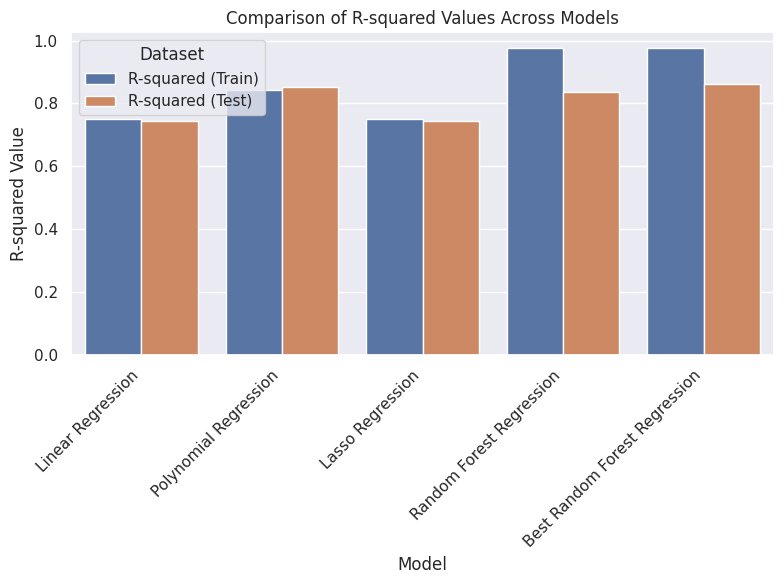

In [37]:
# Collect the R-squared values for training and test data from each model
models = ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Random Forest Regression', 'Best Random Forest Regression']
r2_train_values = [r2_train, r2_train_poly, r2_train_lasso, r2_train_rf, r2_train_rf] # Using r2_train_rf again as GridSearchCV trains on training data
r2_test_values = [r2_test, r2_test_poly, r2_test_lasso, r2_test_rf, r2_test_best_rf]

# Create a DataFrame to hold the R-squared values for plotting
r2_df = pd.DataFrame({
    'Model': models,
    'R-squared (Train)': r2_train_values,
    'R-squared (Test)': r2_test_values
})

# Reshape the DataFrame for plotting with seaborn
r2_df_melted = r2_df.melt('Model', var_name='Dataset', value_name='R-squared')

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='R-squared', hue='Dataset', data=r2_df_melted)
plt.title('Comparison of R-squared Values Across Models')
plt.ylabel('R-squared Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Building a Predictive System

In [38]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Use the best_rf_regressor model to make the prediction
prediction = best_rf_regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[4003.29980171]
The insurance cost is USD  4003.2998017092154


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_rf_regressor, X, Y, cv=kf, scoring='r2')
print("K-Fold Mean R-squared:", scores.mean())

K-Fold Mean R-squared: 0.8501134336053549
